# Simple Regression 
## Using pick position to predict VORP

In [1]:
# import tools for linear regression analysis 
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Access csv file as a DataFrame
picks_df = pd.read_csv("second_rounders_2005-14.csv")

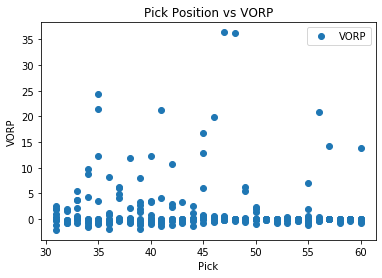

In [3]:
# plot relationship between pick selection and VORP
picks_df.plot(x='Pk', y='VORP', style='o')  
plt.title('Pick Position vs VORP')  
plt.xlabel('Pick')  
plt.ylabel('VORP')  
plt.show()

/srv/app/venv/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


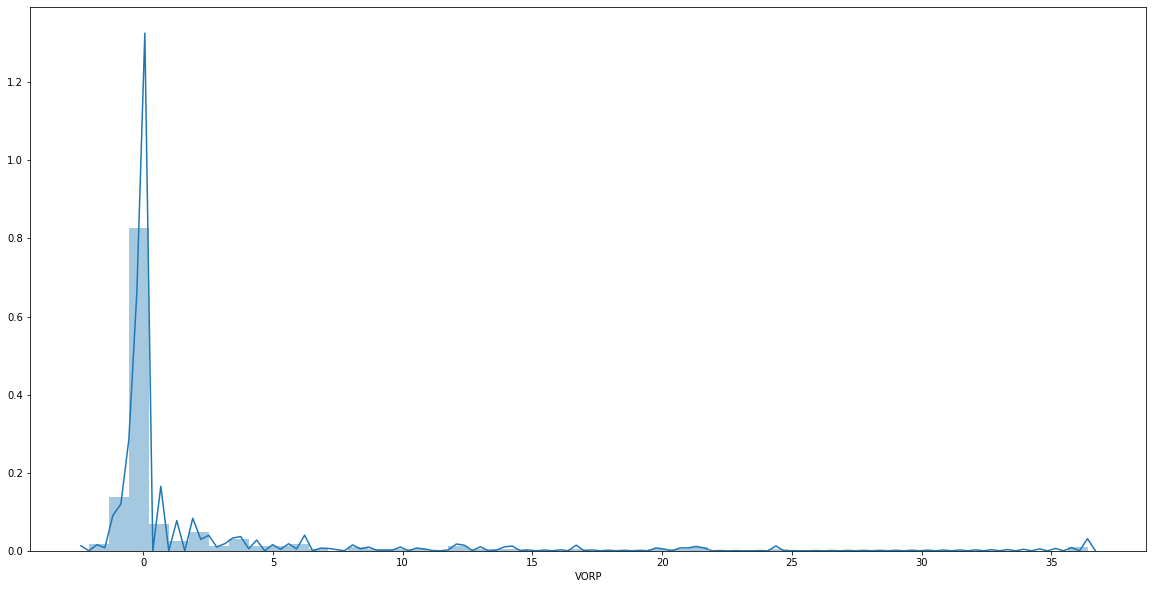

In [4]:
# Graphically observe the average VORP among all 2005-14 second round picks
plt.figure(figsize=(20,10))
plt.tight_layout()
seabornInstance.distplot(picks_df['VORP'])

In [6]:
# assert pick position as the independent variable
X = picks_df['Pk'].values.reshape(-1, 1)
Y = picks_df['VORP'].values.reshape(-1, 1)

# Separate into training set and test set (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
# train the algorithm using the LinearRegression class
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Display intercept and slope using regressor
intercept = regressor.intercept_[0]
slope = regressor.coef_[0][0]
print("Intercept: " + str(round(intercept, 2)) +
     ", Slope: " + str(round(slope, 2)))

Intercept: 3.21, Slope: -0.04


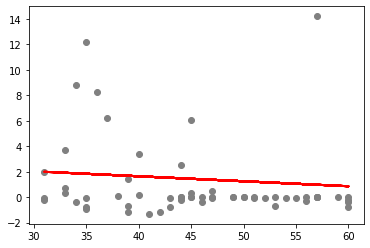

In [9]:
# display as line
Y_pred = regressor.predict(X_test)
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [10]:
# errors
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 2.1236227456707675
Mean Squared Error: 9.262295529653306
Root Mean Squared Error: 3.043401966492975
